In [38]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt

In [39]:
csv_file_path = "C:/Users/asgei/Documents/insurance.csv"

In [40]:
df = pd.read_csv(csv_file_path)

In [41]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [42]:
age = df['age']
sex = df['sex']
bmi = df['bmi']
children = df['children']
smoker = df['smoker']
region = df['region']
charges = df['charges']

In [43]:
#To see if there is a significant difference between the charges of people who smoke and those who don't, 
#we performed a one-sided T-test. Our null hypothesis is that there is no difference between the charges 
#of those who smoke and those who don't. Our alternative hypothesis is that the charges of those who smoke 
#are significantly higher than those who don't. 

In [44]:
t_statistic, p_value = ttest_ind(charges[smoker == 'yes'], charges[smoker == 'no'], alternative='greater')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 46.66492117272371
P-value: 4.135717921089551e-283


In [45]:
#The outcome of our test is below the significance threshold of 0.05 supporting our alternative theory that smokers 
#pay higher charges than those who don't smoke. 

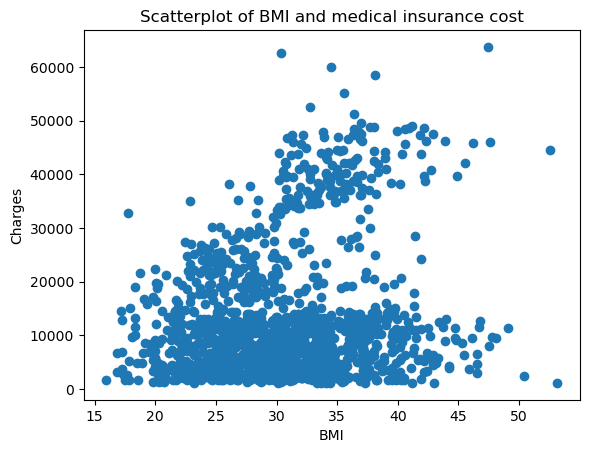

In [46]:
plt.scatter(bmi, charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatterplot of BMI and medical insurance cost')
plt.show()
plt.close()

In [47]:
#A positive relationship exists between BMI and charges (medical insurance cost), 
#but it is not very strong. To further inspect the relationship, we explore the Pearson's R coefficient. 

In [48]:
correlation_coefficient, p_value = pearsonr(bmi, charges)

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.1983409688336289
P-value: 2.459085535117846e-13


In [49]:
#Pearson's correlation coefficient for these variables is close to 0.2, which indicates that BMI does not have much 
#effect on the cost of medical insurance. BMI does not consider body composition, so it is arguably good that its impact 
#on the cost of medical insurance is at first glance sight. 

In [50]:
#The next thing that we want to explore is whether there is a significant difference between men and women 
#regarding the cost of medical insurance. But first, let's see if the genders are of similar portions in the dataset.  

In [51]:
gender_proportions = sex.value_counts(normalize=True)
print(gender_proportions)

male      0.505232
female    0.494768
Name: sex, dtype: float64


In [52]:
#The percentage of men and women in the dataset is similar. 
#Let's explore if there is a difference between them regarding the cost of medical insurance.
#Our null hypothesis is that there is no difference between the genders regarding the cost of medical insurance. 
#Our alternative hypothesis is that medical insurance costs are not the same for the genders. 
#As we are unsure which gender would incur more cost, we will perform a two-sided T-test. 

In [53]:
t_statistic, p_value = ttest_ind(charges[sex == 'female'], charges[sex == 'male'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.097546590051688
P-value: 0.03613272100592976


In [54]:
#The result of the T-test shows us that there is a difference between these two groups. 
#Let's see if males or females have higher mean medical costs.

In [55]:
mean_cost_by_gender = df.groupby('sex')['charges'].mean()

print(mean_cost_by_gender)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [56]:
#Males do indeed have higher mean medical insurance costs. 

In [57]:
#Could this be because of a third variable? Let's see if men are more likely to smoke than women. 
#To do this, we will perform a chi-square test. 

In [58]:
contingency_table = pd.crosstab(sex, smoker)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 7.39291081459996
P-value: 0.006548143503580696


In [59]:
#There is a difference between these two groups, but let's see whether men or women are more likely to smoke. 

In [60]:
contingency_table = pd.crosstab(sex, smoker)

proportions = contingency_table / contingency_table.sum(axis=1).values.reshape(-1, 1)

print(proportions)

smoker        no       yes
sex                       
female  0.826284  0.173716
male    0.764793  0.235207


In [61]:
#It is, in fact, men that are more likely to smoke, which might be why they have higher insurance costs.

In [62]:
#We have had a lot of fun with this dataset, and although there are many questions we could still ask and try to answer, 
#we will stop now. But before that, let's look at a few descriptive statistics for the dataset. 
#Let's see where people are from, the mean age for individuals in the dataset, and the mean cost of medical insurance. 

In [64]:
mean_value = age.mean()

print(f"The mean age of individuals in the dataset is {mean_value} years old")

The mean age of individuals in the dataset is 39.20702541106129 years old


In [68]:
mean_cost = charges.mean()

print(f"The mean cost of medical insurance is {mean_cost} dollars")

The mean cost of medical insurance is 13270.422265141257 dollars


In [70]:
region_counts = region.value_counts()

print(region_counts)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [71]:
#That is all, folks. I thank you for taking the time to read my code instead of watching Netflix. I feel like we could be friends. 
#Please connect with me on Linkedin. 